# Peter Kim, UCI Data Analytics Bootcamp
January 22, 2019

## Outline
1. Files and Setup
<br>

    1. Jupyter Notebook: "UCI - YouTube Spam.ipynb"
        1. CSV file: "Youtube04-Eminem.csv"
    1. Make sure installed: (I'm using Anaconda distribution of Python 3)
        1. sklearn
        1. pandas
        1. re
        1. nltk
        1. matplotlib
        1. numpy
1. Background and context (depending on pace)
    1. Python
    1. Jupyter Notebook
    1. Scikit-Learn
    1. Machine Learning
    1. Text Classification


## Text Classification with Scikit-Learn

YouTube Spam Collection

The YouTube Spam Collection v. 1 is a public set of YouTube comments that have been collected for spam research. It has five datasets composed by 1,956 real and non-encoded messages that were labeled as legitimate (ham) or spam.
>Alberto, T.C., Lochter J.V., Almeida, T.A. TubeSpam: Comment Spam Filtering on YouTube. Proceedings of the 14th IEEE International Conference on Machine Learning and Applications (ICMLA'15), 1-6, Miami, FL, USA, December, 2015. (preprint).  
>
>Available at UCI Machine Learning Repository.
><br>Source: http://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection#

Download the zip files.  Make sure to include file "Youtube04-Eminem.csv" in same directory.

## Great tutorial on NLP using Scikit-Learn by Kevin Markham
* https://github.com/justmarkham/pycon-2016-tutorial 
* https://www.youtube.com/watch?v=WHocRqT-KkU

## Also review the Andreas Mueller book for examples
* http://shop.oreilly.com/product/0636920030515.do

In [1]:
# Python libraries
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics

In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to /home/peter/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [4]:
# Dataframe with Eminem YouTube comments
df_eminem = pd.read_csv("Youtube04-Eminem.csv")

In [5]:
df_eminem.shape

(448, 5)

In [6]:
df_eminem.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

# Examine dataframe 
{Class 0: ham, Class 1: spam}
<br>'CONTENT' field is the comment, 'CONTENT' field is the class.
<br>Ignore the other fields.

In [7]:
# Examine dataframe  {Class 0: ham, Class 1: spam}
df_eminem.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [8]:
df_eminem['CLASS'].value_counts()

1    245
0    203
Name: CLASS, dtype: int64

In [9]:
# df_eminem['CLASS'].value_counts()
# df_eminem['CLASS'].value_counts().rename(index={1: 'Spam', 0: 'Ham'})
vc_class = df_eminem['CLASS'].value_counts()
vc_class = vc_class.rename(index={1: 'Spam', 0: 'Ham'})
vc_class = vc_class.sort_index()
vc_class

Ham     203
Spam    245
Name: CLASS, dtype: int64

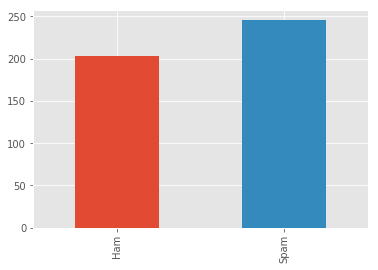

In [10]:
# hist(bins=bins, grid=False); plt.xticks([0,1])
vc_class.plot(kind='bar')

In [11]:
# Split the Content and Classes into train and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(df_eminem['CONTENT'], df_eminem['CLASS'], 
                                                    random_state=1, test_size=0.2, stratify=df_eminem['CLASS'])

In [12]:
print('X training size: ', X_train.shape)
print('y training size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X training size:  (358,)
y training size:  (358,)
X test size:  (90,)
y test size:  (90,)


# Vectorize Text into DTM (with Pre-Processing)
* Pre-processing function
* List comprehension with pre-processing function
* LemmaTokenizer class
* CountVectorizer object with LemmaTokenizer

# Surprise: performs worse with pre-processing

In [13]:
# # Pre-processing from Kaggle tutorial

# stop_nltk = stopwords.words("english")
# stop_nltk_plus = stop_nltk + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',
#                          u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',
#                          u'u',u'v',u'w',u'x',u'y',u'z']
# # 4. In Python, searching a set is much faster than searching
# #     a list, so convert the stop words to a set
# stops = set(stop_nltk_plus)
    
# # function to process 10k documents
# def process_10kchars(input_text):
#     # 1. Remove non-letters, and make lowercase
#     letters_only = re.sub("[^a-zA-Z]", " ", input_text)
        
#     # 3. Convert to lower case, split into individual words
#     words = letters_only.lower().split()    
    
#     # 5. Remove stop words
#     meaningful_words = [w for w in words if not w in stops]   
    
#     # 6. Join the words back into one string separated by space, 
#     # and return the result.
#     return( " ".join( meaningful_words ))   

In [14]:
# %%time
# # Wall time: 22.1 s

# # list comprehension on X_train_chunks, with process_10kchars
# X_train_process = [process_10kchars(text_file) for text_file in X_train]

# X_test_process = [process_10kchars(text_file) for text_file in X_test]

In [15]:
# # create a new CountVectorizer with lemmatizer
# class LemmaTokenizer(object):
#     def __init__(self):
#         self.wnl = WordNetLemmatizer()
#     def __call__(self, doc):
#         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
# count_vect_lemma = CountVectorizer(tokenizer=LemmaTokenizer())  

In [16]:
# # instantiate CountVectorizer object, with LemmaTokenizer()
# count_vect_lemma = CountVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(1, 2), max_features=1000, 
#                                    max_df=0.90, stop_words='english') 

# # Fit the vectorizer object to the X_train text
# X_train_vect = count_vect_lemma.fit(X_train_process, y_train)

# # Transform the training text into a document-term-matrix
# X_train_dtm = X_train_vect.transform(X_train_process)

# print "Size of training dtm: ", X_train_dtm.shape

# # Transform the test text into a document-term-matrix (input fed into models)
# X_test_dtm = X_train_vect.transform(X_test_process)

# print "Size of test dtm: ", X_test_dtm.shape

# Vectorize text into DTM (no pre-processing)
* Leave text unprocessed, no lemmatization

In [18]:
# Instantiate a vectorizer for document-term-matrix
vect = CountVectorizer(max_features=1000)

# Fit the vectorizer object to the X_train text
X_train_vect = vect.fit(X_train, y_train)

# Transform the training text into a document-term-matrix
X_train_dtm = X_train_vect.transform(X_train)

print("Size of training dtm: ", X_train_dtm.shape)

Size of training dtm:  (358, 1000)


In [19]:
# The vectorizer object has method .get_feature_names()
# to show the words and bi-grams used in feature vector.  
print(vect.get_feature_names()[0:20])
print("\n")
print(vect.get_feature_names()[100:120])
print("\n")
print(vect.get_feature_names()[-20:])

['00', '000', '047000', '09', '10', '100', '1000', '100877300245414', '11', '12', '12year', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1990']


['admitting', 'adult', 'advance', 'advertise', 'advertisements', 'afraid', 'aftermath', 'again', 'ago', 'agree', 'agreeable', 'aimbwbfqbzg', 'album', 'alcoholic', 'ali', 'alive', 'all', 'almost', 'aloidia', 'already']


['yahoo', 'yeah', 'year', 'years', 'yesterday', 'yfuy4gkr1c', 'yo', 'yoffa', 'you', 'young', 'your', 'yourself', 'youtu', 'youtube', 'youtuber', 'youtubers', 'yrs', 'ytma', 'yuttx04oyqq', 'zonepa']


In [20]:
# What does the actual dtm look like?  Convert to array (from sparse matrix).
# Just one line (i.e. one document).  
X_train_dtm.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [21]:
# Transform the test text into a document-term-matrix (input fed into models)
X_test_dtm = X_train_vect.transform(X_test)

print("Size of test dtm: ", X_test_dtm.shape)

Size of test dtm:  (90, 1000)


## Text Classification Example Without GridSearchCV
* In practice, the GridSearchCV class accomplishes same result, while tuning combinations of model parameters.
* But to make it simpler to follow the workflow, here is an example of text classification step-by-step.

In [22]:
# Step 1: Instatiate a classifier object.
rf_clf = RandomForestClassifier()

# Step 2: "Fit" training data onto model, both data and labels.
# The machine is "learning" how the training words match the label data (or "classes").  
rf_clf.fit(X_train_dtm, y_train)

# Step 3: Predict test data using model, only data (not labels)
# Store results as predictions on test data ... next we will compare with real labels.  
rf_test_predictions = rf_clf.predict(X_test_dtm)

In [23]:
print("Random Forest Classifier Accuracy: ")

# print accuracy of class predictions
print(metrics.accuracy_score(y_test, rf_test_predictions))

# print the confusion matrix
print("\nConfusion Matrix: ")
print("(rows are actual, columns are predictions)")
print(metrics.confusion_matrix(y_test, rf_test_predictions))

# print the Classification Report
print("\nClassification Report: ")
print(metrics.classification_report(y_test, rf_test_predictions,target_names=["Ham", "Spam"]))

Random Forest Classifier Accuracy: 
0.9666666666666667

Confusion Matrix: 
(rows are actual, columns are predictions)
[[40  1]
 [ 2 47]]

Classification Report: 
             precision    recall  f1-score   support

        Ham       0.95      0.98      0.96        41
       Spam       0.98      0.96      0.97        49

avg / total       0.97      0.97      0.97        90



# Classification Technique #1: Random Forest Classifier

In [24]:
%%time

# Use GridSearchCV to tune model parameters

# 0.95251396648
# bootstrap: False
# class_weight: 'balanced'
# n_estimators: 50
# Wall time: 40.1 s

# parameters 
parameters_rf = {'n_estimators': (10, 50, 100),                 # default 10
                 'bootstrap': (True, False),                          # default true
                  'class_weight': ('balanced', None)}                # default None

# instantiate a classifier object
rf = RandomForestClassifier(random_state=42)

# instantiate a GridSearchCV object
gs_rf = GridSearchCV(rf, parameters_rf, n_jobs=-1)

# fit the GridSearchCV object to the training data
gs_rf = gs_rf.fit(X_train_dtm, y_train)

print(gs_rf.best_score_)

for param_name in sorted(parameters_rf.keys()):
    print("%s: %r" % (param_name, gs_rf.best_params_[param_name]))

0.9441340782122905
bootstrap: False
class_weight: None
n_estimators: 100
CPU times: user 200 ms, sys: 48 ms, total: 248 ms
Wall time: 1.32 s


In [26]:
print("Random Forest Classifier: ")

# predict classification
gs_rf_test_predictions = gs_rf.predict(X_test_dtm)

# print accuracy of class predictions
print(metrics.accuracy_score(y_test, gs_rf_test_predictions))

# print the confusion matrix
print(metrics.confusion_matrix(y_test, gs_rf_test_predictions))

print(metrics.classification_report(y_test, gs_rf_test_predictions,target_names=["Ham", "Spam"]))

Random Forest Classifier: 
0.9444444444444444
[[39  2]
 [ 3 46]]
             precision    recall  f1-score   support

        Ham       0.93      0.95      0.94        41
       Spam       0.96      0.94      0.95        49

avg / total       0.94      0.94      0.94        90



In [27]:
# Verify classes against the y_test data
print("Compare Target Class Label Counts to Classification Report")
print("0: Ham, 1: Spam\n")
print(y_test.value_counts(ascending=True))

Compare Target Class Label Counts to Classification Report
0: Ham, 1: Spam

0    41
1    49
Name: CLASS, dtype: int64


# Classification Technique #2: Multinomial Naive Bayes

In [28]:
%%time

# Use GridSearchCV to tune model parameters

# parameters for MultinomialNB
parameters_mnb = {'alpha': (0.001, 0.01, 0.1, 1.0, 10.0, 100.0),
                 'fit_prior': (True, False)}    # default is True, use uniform if False

# instantiate a MultinomialNB object
mnb = MultinomialNB()

# instantiate a GridSearchCV object
gs_mnb = GridSearchCV(mnb, parameters_mnb, n_jobs=-1)

# fit the GridSearchCV object to the training data
gs_mnb = gs_mnb.fit(X_train_dtm, y_train)

print("Grid Search for MultinomialNB")
print("Accuracy: ", gs_mnb.best_score_)
print("alpha: ", gs_mnb.best_params_['alpha'])
print("fit_prior: ", gs_mnb.best_params_['fit_prior'])
# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Grid Search for MultinomialNB
Accuracy:  0.9134078212290503
alpha:  0.1
fit_prior:  False
CPU times: user 64 ms, sys: 52 ms, total: 116 ms
Wall time: 194 ms


In [29]:
print("Multinomial Naive Bayes: ")

# predict classification
gs_mnb_test_predictions = gs_mnb.predict(X_test_dtm)

# print accuracy of class predictions
print(metrics.accuracy_score(y_test, gs_mnb_test_predictions))

# print the confusion matrix
print(metrics.confusion_matrix(y_test, gs_mnb_test_predictions))

# calculate predicted probabilities (poorly calibrated)
gs_y_pred_test = gs_mnb.predict_proba(X_test_dtm)[:, 1]

# print AUC
print(metrics.roc_auc_score(y_test, gs_y_pred_test))

# print classification report
print(metrics.classification_report(y_test, gs_mnb_test_predictions,target_names=["Ham", "Spam"]))

Multinomial Naive Bayes: 
0.9333333333333333
[[37  4]
 [ 2 47]]
0.9736187157789945
             precision    recall  f1-score   support

        Ham       0.95      0.90      0.92        41
       Spam       0.92      0.96      0.94        49

avg / total       0.93      0.93      0.93        90



In [30]:
# Verify classes against the y_test data
print("Compare Target Class Label Counts to Classification Report")
print("0: Ham, 1: Spam\n")
print(y_test.value_counts(ascending=True))

Compare Target Class Label Counts to Classification Report
0: Ham, 1: Spam

0    41
1    49
Name: CLASS, dtype: int64


# Classification Technique #3: Support Vector Machines

In [31]:
%%time

# Use GridSearchCV to tune model parameters

# 0.949720670391
# alpha: 0.01
# class_weight: 'balanced'
# penalty: 'elasticnet'
# Wall time: 23 s

# parameters for SVM
parameters_svm = {'penalty': (None, 'l1', 'l2', 'elasticnet'),  # default is 'l2'
                  'alpha': (0.0001, 0.01, 1.0),                 # default 0.0001
                  'class_weight': ('balanced', None)}           # default None

# instantiate a SVM object
svm = SGDClassifier(loss='hinge', random_state=42)

# instantiate a GridSearchCV object
gs_svm = GridSearchCV(svm, parameters_svm, n_jobs=-1)

# fit the GridSearchCV object to the training data
gs_svm = gs_svm.fit(X_train_dtm, y_train)

print(gs_svm.best_score_)

for param_name in sorted(parameters_svm.keys()):
    print("%s: %r" % (param_name, gs_svm.best_params_[param_name]))

/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anacon

/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anacon

/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anacon

/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anacon

/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/peter/anacon

0.9497206703910615
alpha: 0.01
class_weight: 'balanced'
penalty: 'elasticnet'
CPU times: user 132 ms, sys: 60 ms, total: 192 ms
Wall time: 301 ms


/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [32]:
print("Support Vector Machines: ")

# predict classification
gs_svm_test_predictions = gs_svm.predict(X_test_dtm)

# print accuracy of class predictions
print(metrics.accuracy_score(y_test, gs_svm_test_predictions))

# print the confusion matrix
print(metrics.confusion_matrix(y_test, gs_svm_test_predictions))

print(metrics.classification_report(y_test, gs_svm_test_predictions,target_names=["Ham", "Spam"]))

Support Vector Machines: 
0.9444444444444444
[[39  2]
 [ 3 46]]
             precision    recall  f1-score   support

        Ham       0.93      0.95      0.94        41
       Spam       0.96      0.94      0.95        49

avg / total       0.94      0.94      0.94        90



In [33]:
# Verify classes against the y_test data
print("Compare Target Class Label Counts to Classification Report")
print("0: Ham, 1: Spam\n")
print(y_test.value_counts(ascending=True))

Compare Target Class Label Counts to Classification Report
0: Ham, 1: Spam

0    41
1    49
Name: CLASS, dtype: int64


# Classification Technique #4: Logistic Regression

In [34]:
%%time

# Use GridSearchCV to tune model parameters

# 0.95530726257
# C: 1.0
# class_weight: None
# penalty: 'l2'
# Wall time: 5.55 s

# parameters 
parameters_lr = {'penalty': ('l1', 'l2'),               # default is 'l2'
                  'C': (0.01, 1.0, 10.0, 100.0),            # default 1.0
                  'class_weight': ('balanced', None)}                         # default None

# instantiate a LogisticRegression object
lr = LogisticRegression(random_state=42)

# instantiate a GridSearchCV object
gs_lr = GridSearchCV(lr, parameters_lr, n_jobs=-1)

# fit the GridSearchCV object to the training data
gs_lr = gs_lr.fit(X_train_dtm, y_train)

print(gs_lr.best_score_)

for param_name in sorted(parameters_lr.keys()):
    print("%s: %r" % (param_name, gs_lr.best_params_[param_name]))

0.9553072625698324
C: 1.0
class_weight: 'balanced'
penalty: 'l2'
CPU times: user 96 ms, sys: 44 ms, total: 140 ms
Wall time: 319 ms


In [35]:
print("Logistic Regression: ")

# predict classification
gs_lr_test_predictions = gs_lr.predict(X_test_dtm)

# print accuracy of class predictions
print(metrics.accuracy_score(y_test, gs_lr_test_predictions))

# print the confusion matrix
print(metrics.confusion_matrix(y_test, gs_lr_test_predictions))

print(metrics.classification_report(y_test, gs_lr_test_predictions,target_names=["Ham", "Spam"]))

Logistic Regression: 
0.9666666666666667
[[41  0]
 [ 3 46]]
             precision    recall  f1-score   support

        Ham       0.93      1.00      0.96        41
       Spam       1.00      0.94      0.97        49

avg / total       0.97      0.97      0.97        90



In [37]:
# Verify classes against the y_test data
print("Compare Target Class Label Counts to Classification Report")
print("0: Ham, 1: Spam\n")
print(y_test.value_counts(ascending=True))

Compare Target Class Label Counts to Classification Report
0: Ham, 1: Spam

0    41
1    49
Name: CLASS, dtype: int64


In [38]:
# Below is a markdown cell

# Comparison of Models (w/o Pre-Processing, with GridSearch)

(Precision, Recall, F1-Score for the Spam Class Only)

| Model                    | Accuracy   | Precision    | Recall    | F1-Score    |
|--------------------------|------------|--------------|-----------|-------------|
| Random Forest            | 0.9555     | 0.98         | 0.94      | 0.96        |
| Multinomial Naive Bayes  | 0.9333     | 0.92         | 0.96      | 0.94        |
| Support Vector Machines  | 0.9778     | 1.00         | 0.96      | 0.98        |
| Logistic Regression      | 0.9667     | 1.00         | 0.94      | 0.97        |
